In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from cma import get_topk
import os

/tmp/ipykernel_262048/2227021985.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# def get_all_seeds(LOAD_MODEL_PATH):
    

In [3]:
LOAD_MODEL_PATH = '../../models/recent_baseline/'
NIE_paths = []
with open("../experiment_config.yaml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [4]:
k = config['k']
# select candidates based on the number of neurons
num_top_neurons = config['num_top_neurons']
topk = get_topk(config, k, num_top_neurons)
key = list(topk.keys())[0]
if not isinstance(topk[key], list): topk[key] = [topk[key]]
layers = config['layers'] if config['computed_all_layers'] else config['layer']
mode = ["High-overlap"]  if config['treatment'] else  ["Low-overlap"] 
top_neurons = {}
x_layer = {}
y_nie = {}
treatments = {}

if config['computed_all_layers']:
    for seed in os.listdir(LOAD_MODEL_PATH):
        cur_seed = seed.split('_')[-1]
        if seed not in x_layer.keys(): x_layer[seed] = []
        if seed not in y_nie.keys():   y_nie[seed] = []
        if seed not in treatments.keys(): treatments[seed] = []
        for do in ["High-overlap", "Low-overlap"]:
            for value in topk[key]:
                cur_key = f"{key}-{seed}-{do}"
                with open(f'../../pickles/top_neurons/top_neuron_{cur_seed}_{key}_{do}_all_layers.pickle', 'rb') as handle:
                    top_neurons[cur_key] = pickle.load(handle)
                x_layer[seed].extend([ int(k.split('-')[1]) for k, v in top_neurons[cur_key][value].items()])
                y_nie[seed].extend([float(v) for k, v in top_neurons[cur_key][value].items()])
                treatments[seed].extend([do] * len(top_neurons[cur_key][value].keys()))
else:
    pass

In [5]:
import pandas as pd 
data = {}
df = {}
for seed in list(x_layer.keys()):
    data[seed] = {'Layer index': x_layer[seed], 
                  'Indirect effects of top neurons':  y_nie[seed],
                 'Treatment': treatments[seed]}
    df[seed] = pd.DataFrame(data=data[seed])

[Text(0.5, 1.0, 'seed_3990')]

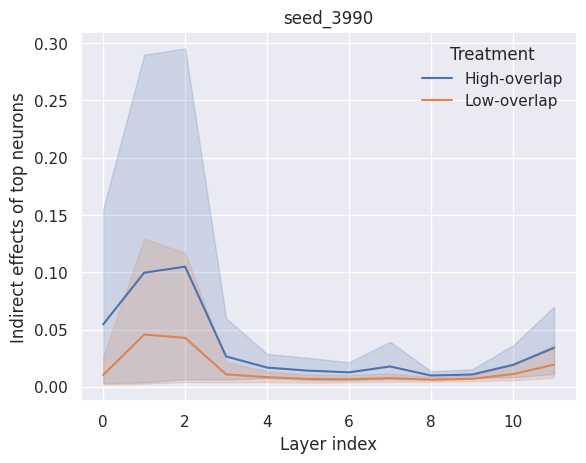

In [8]:
import seaborn as sns
sns.set_theme(style="darkgrid")
# 'seed_3990', 'seed_409', 'seed_3099', 'seed_42', 'seed_3785'
seed = 'seed_3990'
sns.lineplot(data=df[seed], x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title=f'{seed}')
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")


[Text(0.5, 1.0, 'seed_409')]

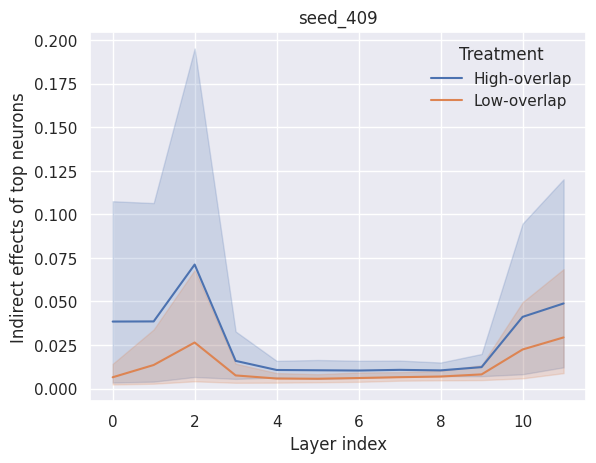

In [9]:
seed = 'seed_409'
sns.lineplot(data=df[seed], x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title=f'{seed}')
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event")


[Text(0.5, 1.0, 'seed_3099')]

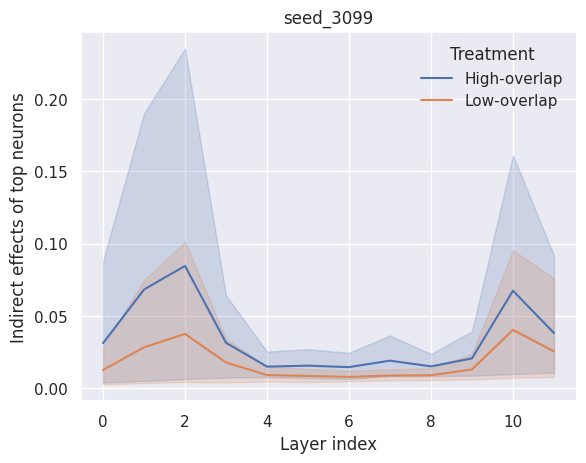

In [10]:
seed = 'seed_3099'
sns.lineplot(data=df[seed], x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title=f'{seed}')

[Text(0.5, 1.0, 'seed_42')]

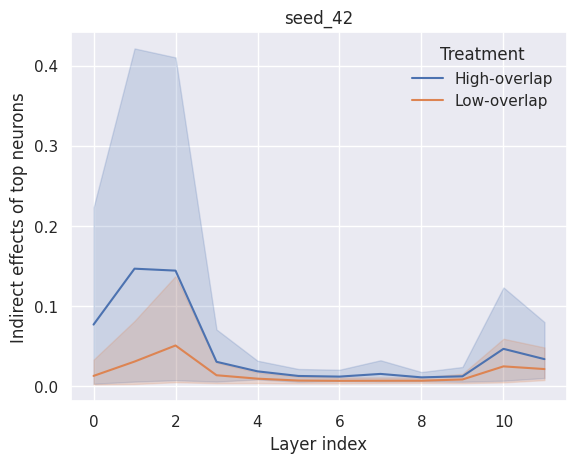

In [11]:
seed = 'seed_42'
sns.lineplot(data=df[seed], x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title=f'{seed}')

[Text(0.5, 1.0, 'seed_3785')]

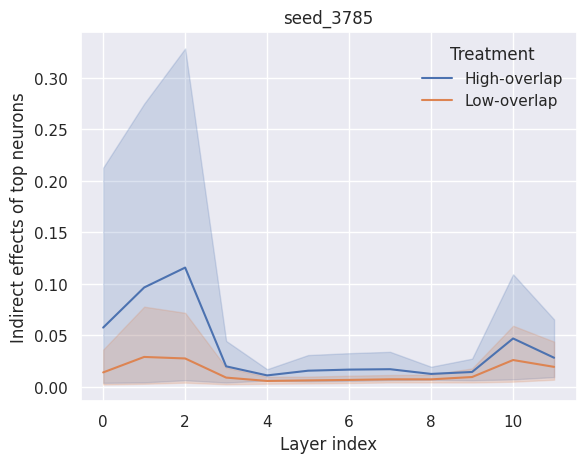

In [12]:
seed = 'seed_3785'
sns.lineplot(data=df[seed], x="Layer index", y='Indirect effects of top neurons',hue="Treatment").set(title=f'{seed}')